In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('MachineLearning-Model/HR_dataset.csv')

Explore the dataset

In [147]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.65,0.96,5,226,2,1,0,0,marketing,medium
1,0.88,0.80,3,166,2,0,0,0,IT,low
2,0.69,0.98,3,214,2,0,0,0,sales,low
3,0.41,0.47,2,154,3,0,1,0,sales,low
4,0.87,0.76,5,254,2,1,0,0,hr,low
...,...,...,...,...,...,...,...,...,...,...
495,0.62,0.64,4,163,3,0,0,0,technical,low
496,0.43,0.49,2,131,3,0,1,0,RandD,high
497,0.99,0.77,4,184,3,0,0,0,marketing,medium
498,0.81,1.00,5,143,2,0,0,0,support,low


In [148]:
df.info

<bound method DataFrame.info of      satisfaction_level  last_evaluation  number_project  \
0                  0.65             0.96               5   
1                  0.88             0.80               3   
2                  0.69             0.98               3   
3                  0.41             0.47               2   
4                  0.87             0.76               5   
..                  ...              ...             ...   
495                0.62             0.64               4   
496                0.43             0.49               2   
497                0.99             0.77               4   
498                0.81             1.00               5   
499                0.10             0.91               6   

     average_montly_hours  time_spend_company  Work_accident  left  \
0                     226                   2              1     0   
1                     166                   2              0     0   
2                     214            

In [149]:
print("Data Shape:: ", df.shape)

Data Shape::  (500, 10)


In [150]:
print("DataSet Length:: ", len(df))

DataSet Length::  500


In [151]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Independent(X) and Dependent Variable(Y)

In [154]:
X = df.drop(columns=['left'])
Y = df['left']

Train test Split

In [171]:
X_processed = pd.get_dummies(X, columns=['Department', 'salary'], drop_first=True)

X_train_columns = X_processed.columns

Y_encoded = Y
class_names = ['Stayed', 'Left']
            #     0        1 

X_train, X_test, Y_train, Y_test = train_test_split(
    X_processed, Y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=Y_encoded 
)


scaler = StandardScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train_columns,
    index=X_train.index
)
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train_columns,
    index=X_test.index
)

print("Class distribution:")
print(df['left'].value_counts())

Class distribution:
left
0    372
1    128
Name: count, dtype: int64


In [172]:
X_train.shape
X_test.shape

(100, 18)

Building the model

In [173]:
rf_model = RandomForestClassifier(
    n_estimators=100,       
    criterion='entropy',    
    max_depth=None,         
    random_state=42,
    n_jobs=-1               
)
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Prediction

In [174]:
Y_pred = rf_model.predict(X_test)

Vizualization of the Random Forest

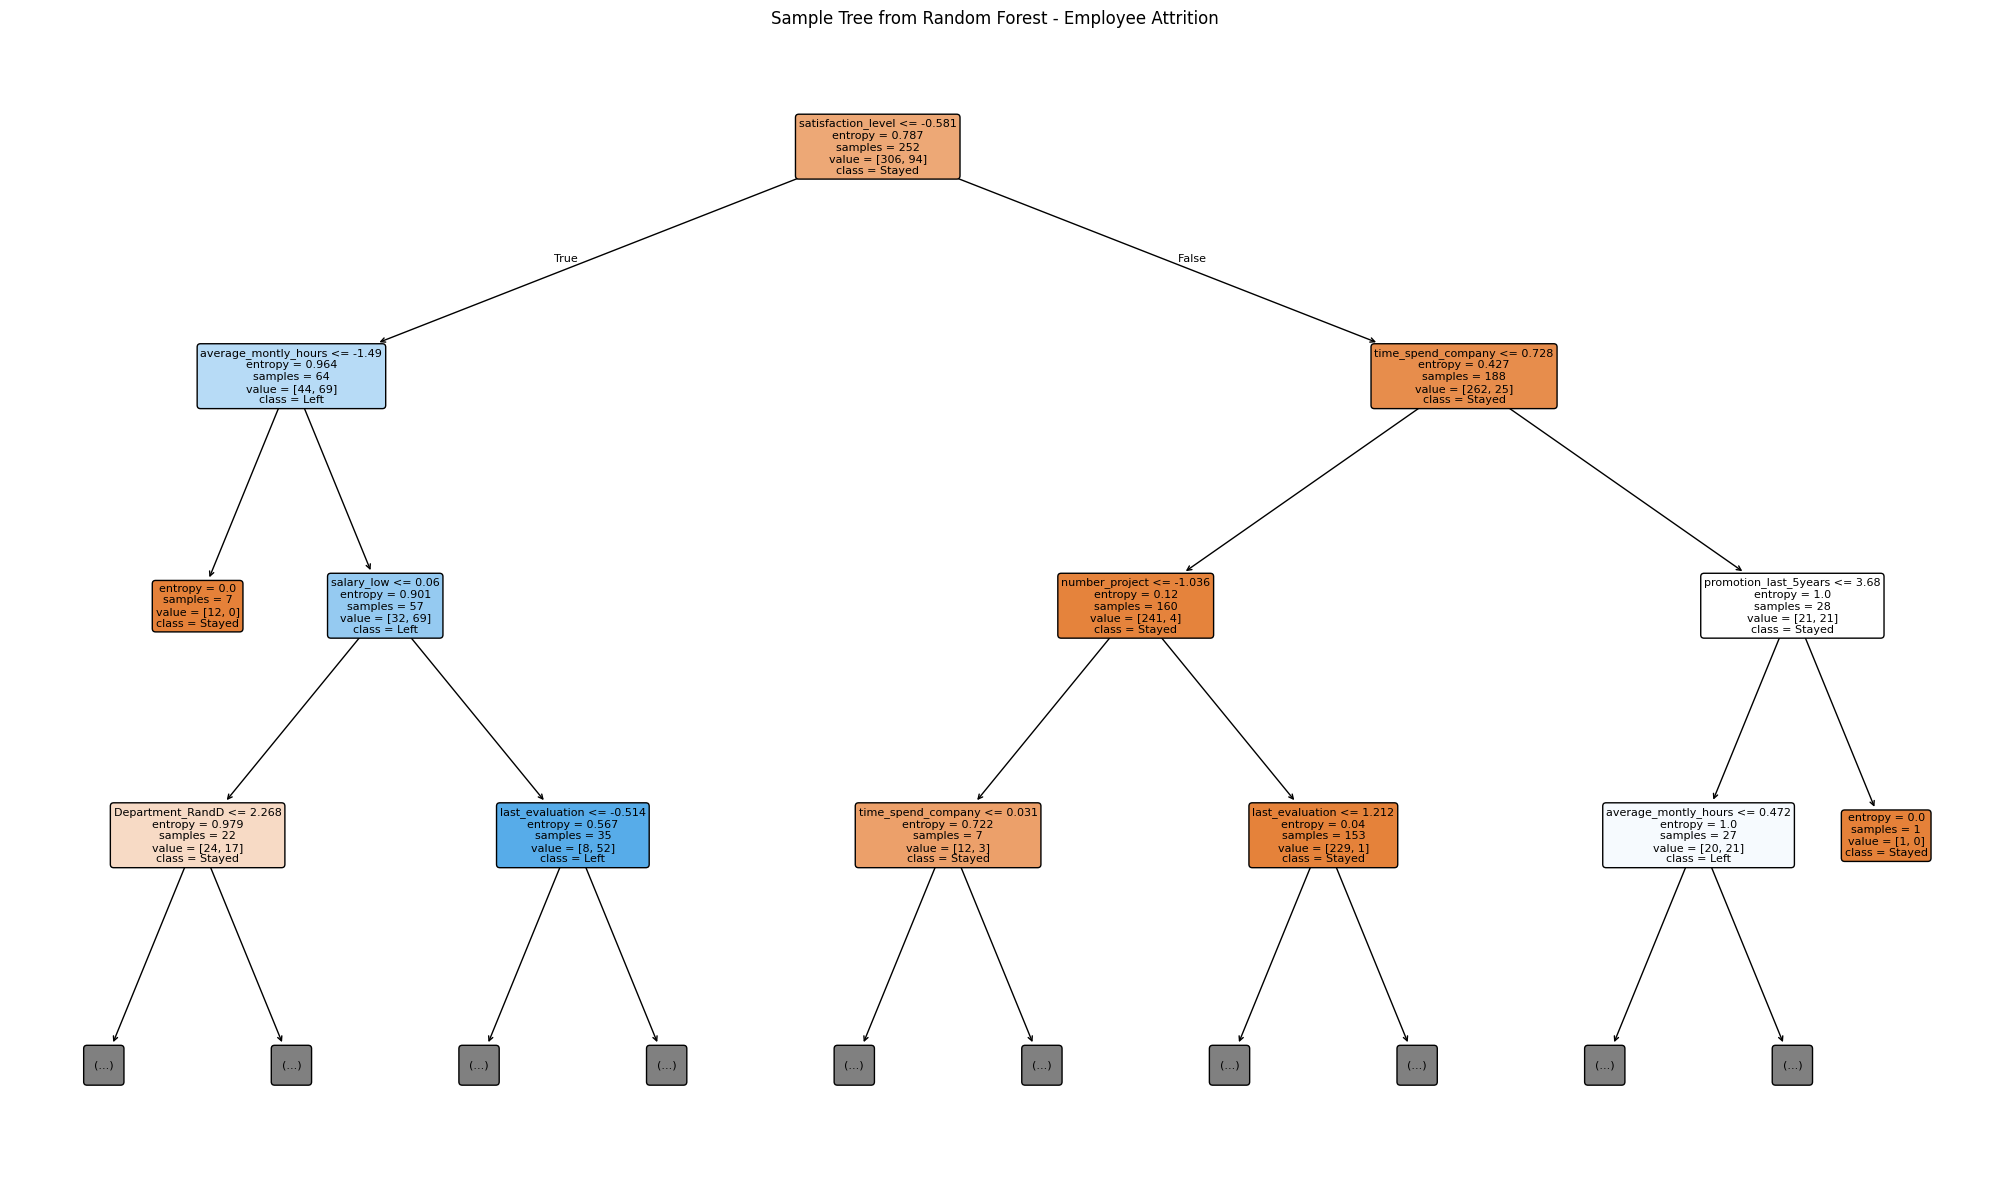

In [182]:
from sklearn import tree
import matplotlib.pyplot as plt

# Get one tree from the random forest
single_tree = rf_model.estimators_[99]

plt.figure(figsize=(20, 12))
tree.plot_tree(
    single_tree,
    feature_names=X_train.columns, 
    class_names=["Stayed", "Left"], 
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3  # Added to limit depth for better readability
)
plt.title("Sample Tree from Random Forest - Employee Attrition")
plt.tight_layout()
plt.show()

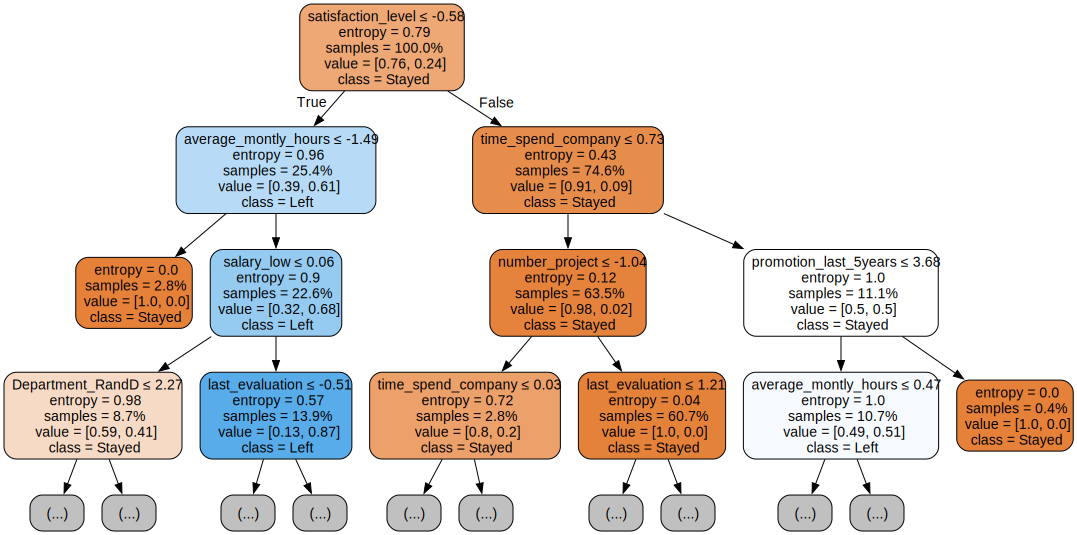

In [187]:
from sklearn.tree import export_graphviz
import graphviz

single_tree = rf_model.estimators_[99]

dot_data = export_graphviz(
    single_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Stayed", "Left"],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,  
    precision=2,      
    max_depth=3       
)

graph = graphviz.Source(dot_data)

graph

Evaluate the Model

In [188]:
Y_pred = rf_model.predict(X_test)

print("\n--- Random Forest Evaluation ---")
print("Accuracy:", round(accuracy_score(Y_test, Y_pred) * 100, 2))
print("F1 Score:", round(f1_score(Y_test, Y_pred, average='weighted'), 3))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred, target_names=class_names))



--- Random Forest Evaluation ---
Accuracy: 96.0
F1 Score: 0.959

Classification Report:
               precision    recall  f1-score   support

      Stayed       0.96      0.99      0.97        74
        Left       0.96      0.88      0.92        26

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100



In [189]:
cv_scores = cross_val_score(rf_model, X_processed, Y_encoded, cv=5)
print("\n---- Cross-Validation (5-Fold) ----")
print("Cross-validation scores:", np.round(cv_scores, 3))
print("Mean:", round(cv_scores.mean(), 3))
print("Std:", round(cv_scores.std(), 3))


---- Cross-Validation (5-Fold) ----
Cross-validation scores: [0.96 0.96 0.98 0.95 0.96]
Mean: 0.962
Std: 0.01


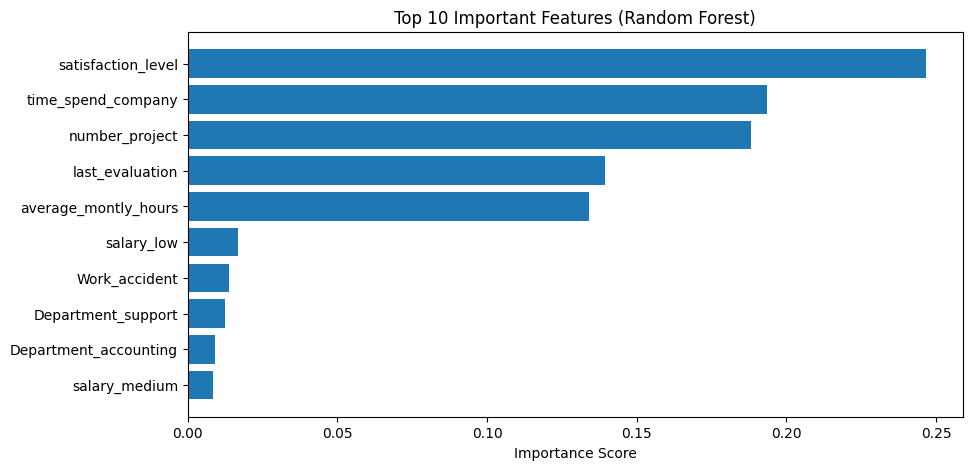


Top Features by Importance:
                   Feature  Importance
0      satisfaction_level    0.246643
4      time_spend_company    0.193625
2          number_project    0.188244
1         last_evaluation    0.139340
3    average_montly_hours    0.133977
16             salary_low    0.016651
5           Work_accident    0.013620
14     Department_support    0.012504
8   Department_accounting    0.009160
17          salary_medium    0.008518


In [191]:
importances = rf_model.feature_importances_
features = X_processed.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

print("\nTop Features by Importance:\n", feat_imp.head(10))